# Introduction to Julia - Part 2

---


## Indexing
We've already seen indexing a few times. Let's review what you have learned already and
look at a few additional tricks and tips.

You can use the keyword `end` to specify the last value in an array. This way you don't need to know exactly how long the array is, nor do you need to use the `length()` or `size()` functions first to get the array's dimension(s).

In [3]:
z = [1,2,3,4,5,6,7,8]
println("z: ", z)
println("first: ", z[1])
println("end: ", z[end])

z: [1, 2, 3, 4, 5, 6, 7, 8]
first: 1
end: 8


You can also extract a *slice* of an array by using the `:` operator.  You put numbers before and after the `:` to specify indices to extract:

In [4]:
println("first three:", z[1:3])
println("4th to end:", z[4:end])

first three:[1, 2, 3]
4th to end:[4, 5, 6, 7, 8]


You can also give a range of indexes using this notation:
`array[start:step:stop]`, where the step part is optional. 

In [5]:
println("every other value: ", z[1:2:8])
println("every 3rd value: ", z[1:3:8])
println("every 3rd value starting from the 2nd value: ", z[2:3:8])

every other value: [1, 3, 5, 7]
every 3rd value: [1, 4, 7]
every 3rd value starting from the 2nd value: [2, 5, 8]


In [6]:
# indexing for 2D arrays:
z2D = [0 1 2 3 ; 4 5 6 7]
println("z2D:")
println(z2D)
println("size(z2D): ",size(z2D))

z2D:
[0 1 2 3; 4 5 6 7]
size(z2D): (2, 4)


In [7]:
println("z2D[0,0]:", z2D[1,1])
println("z2D[-1,-1]:", z2D[end,end])
println("First column:", z2D[:,1])
println("Last column:", z2D[:,end])
println("First row:", z2D[1,:])
println("Last row:", z2D[end,:])
println("First 2 x 2 sub-array: ")
print(z2D[1:2,1:2])

z2D[0,0]:0
z2D[-1,-1]:7
First column:[0, 4]
Last column:[3, 7]
First row:[0, 1, 2, 3]
Last row:[4, 5, 6, 7]
First 2 x 2 sub-array: 
[0 1; 4 5]

In [8]:
# Let's take a look at the notebook's workspace to see what it tells us about ll the variables defined so far:
varinfo()

| name |      size | summary                 |
|:---- | ---------:|:----------------------- |
| Base |           | Module                  |
| Core |           | Module                  |
| Main |           | Module                  |
| z    | 104 bytes | 8-element Vector{Int64} |
| z2D  | 104 bytes | 2×4 Matrix{Int64}       |


 Notice under the summary column that `z` and `z2D` are defined as a *Vector* (i.e. a one dimensional array) and a *Matrix* (i.e. a two-dimensional array), respectively. They also have type `Int64`, meaning 64-bit integers.

# Ranges
Sometimes we will want to generate a long list of integers, especially when we are iterating through data or running time steps in a numerical simulation. While you could do this using an array, Julia has a specific function `range()` that is optimized for creating integer lists.  Here are some examples:

In [9]:
r = range(1,10,length=10)
println(r)

1.0:1.0:10.0


In [10]:
r[1]

1.0

In [11]:
r[end]

10.0

You can also generate a range over a specific interval and with specific spacing using the syntax `range(start, stop ,step=step_length)`, where `step_length` is the spacing between values. 
For example:

In [12]:
r2 = range(1,10,step=2)

1:2:9

In [13]:
r2[1]

1

Ranges are also useful for creating arrays of floating point numbers:

In [14]:
s = range(1,10,step=0.5)

1.0:0.5:10.0

In [15]:
reverse = range(99.1,11.,step=-0.01)

99.1:-0.01:11.0

# Array of other variable types

For most of the numerical work in this course we will be using `Float64` arrays for our computations. However, arrays in Julia can also contain other variable types such as `Int64`, `String`, `Bool` and more.

In [16]:
# example array of strings:
string_array = ["yellow", "red", "blue", "green", "black"]
println("string_array: ",string_array)
typeof(string_array)

string_array: ["yellow", "red", "blue", "green", "black"]


Vector{String} (alias for Array{String, 1})

In [17]:
mixed_array = ["string_stuff", 12, 12.2,true]
println("mixed_array: ", mixed_array)
typeof(mixed_array)

mixed_array: Any["string_stuff", 12, 12.2, true]


Vector{Any} (alias for Array{Any, 1})

In [18]:
# boolean (logical) array:
boolean_array = [true,false,true,true,false]
println("boolean_array: ", boolean_array)
typeof(boolean_array)

boolean_array: Bool[1, 0, 1, 1, 0]


Vector{Bool} (alias for Array{Bool, 1})

# Tuples

A tuple is similar to a list in that it is a sequence of Julia variables. However tuples are immutable, meaning once you define a tuple variable, you can not modify its contents like you can for lists or arrays. 

A tuple is created by putting comma separated values in parentheses:

In [19]:
tuple_example = (1.0, 'a',[1,2,3,4,5])
varinfo()

| name          |      size | summary                                                                                        |
|:------------- | ---------:|:---------------------------------------------------------------------------------------------- |
| Base          |           | Module                                                                                         |
| Core          |           | Module                                                                                         |
| Main          |           | Module                                                                                         |
| boolean_array |  45 bytes | 5-element Vector{Bool}                                                                         |
| mixed_array   | 109 bytes | 4-element Vector{Any}                                                                          |
| r             |  48 bytes | 10-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}   |
| r2            |  24 bytes | 5-element StepRange{Int64, Int64}                                                              |
| reverse       |  48 bytes | 8811-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}} |
| s             |  48 bytes | 19-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}   |
| string_array  | 143 bytes | 5-element Vector{String}                                                                       |
| tuple_example | 104 bytes | Tuple{Float64, Char, Vector{Int64}}                                                            |
| z             | 104 bytes | 8-element Vector{Int64}                                                                        |
| z2D           | 104 bytes | 2×4 Matrix{Int64}                                                                              |


In [20]:
# Access tuple elements using square brackets:
tuple_example[1]

1.0

In [21]:
tuple_example[1:end]

(1.0, 'a', [1, 2, 3, 4, 5])

In [22]:
# try to modify the tuple, this will give an error:
tuple_example[1] = "new_value"

LoadError: MethodError: no method matching setindex!(::Tuple{Float64, Char, Vector{Int64}}, ::String, ::Int64)

In [23]:
# now for comparison, modify the first entry in our list z:
z[1] = 42

42

In [24]:
z2d_shape = size(z2D)
println(typeof(z2d_shape))
println(z2d_shape)

Tuple{Int64, Int64}
(2, 4)


# Dictionaries
Another standard Julia variable type is called a dictionary. They are used to store lists of keyword:value pairs. They are really useful for looking up a value when you know the keyword but not the value. We may visit them later on in the course but for now we will skip over them. For further info, see for example: https://docs.julialang.org/en/v1/base/collections/#Dictionaries


# Functions
Functions are blocks of organized code that are highly reusable and provide a level of modularity to a code. They are a great way to create a piece of code that can be used repeatedly, rather than typing the same lines of code over and over again each time you want to calculate a new value.

In [25]:
# simple function example:
"""    
    hello_world()
Get the string: "Hello World"
"""
function hello_world()
    return "Hello World"
end

hello_world

In [26]:
# To call a function, enter its name followed by parentheses:
hello_world()

"Hello World"

In [27]:
# assign the results of function to the variable str:
str = hello_world()
println(str)

Hello World


In [28]:
### Help!

### Help with functions
When you write a function, you can include some help text, referred to as a *docstring* that notes how to use the function. In Julia, this text can be displayed using the syntax `?functionname`. For example, let's get the docstring for the `range()` function:

In [29]:
?range

search: range LinRange UnitRange StepRange StepRangeLen trailing_zeros



```
range(start[, stop]; length, stop, step=1)
```

Given a starting value, construct a range either by length or from `start` to `stop`, optionally with a given step (defaults to 1, a [`UnitRange`](@ref)). One of `length` or `stop` is required.  If `length`, `stop`, and `step` are all specified, they must agree.

If `length` and `stop` are provided and `step` is not, the step size will be computed automatically such that there are `length` linearly spaced elements in the range.

If `step` and `stop` are provided and `length` is not, the overall range length will be computed automatically such that the elements are `step` spaced.

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

`stop` may be specified as either a positional or keyword argument.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96
```


In our `hello_world()` function, the text in triple quotes is the docstring. Let's display it:

In [30]:
?hello_world

search: hello_world



```
hello_world()
```

Get the string: "Hello World"


Let's create a more interesting function that will take the square (power 2) of the input arguments to the function:

In [31]:
function compute_x_squared(x)
    y = x.^2  # note the use of the dot here so that IF x is an array, it will square each element in the array
    return y
end

compute_x_squared (generic function with 1 method)

In [32]:
# use function with a single scalar as the input:
compute_x_squared(2)

4

In [33]:
# use function with an array input:
compute_x_squared([1. 2. 4.])

1×3 Matrix{Float64}:
 1.0  4.0  16.0

### Function arugments
The variables in the function definition (i.e. its arguments) are called dummy or generic arguments to the function, since they are just represenative variable names and not the actual variable name you need to feed into the function. In other words, uou don't need to use the same variable name(s) outside the function. 

In [34]:
# For example, let's input the variable u:
u = 9
compute_x_squared(u)

81

In [35]:
# Here's a function with two input arguments:
function compute_x_plus_y(x,y)
    z = x + y
    return z
end

compute_x_plus_y (generic function with 1 method)

In [36]:
compute_x_plus_y(1,2)

3

In [37]:
# Here's a function with a two input arguments and two outputs:
function square_inputs(x,y)
    p = x^2
    q = y^2
    return p,q
end

square_inputs (generic function with 1 method)

In [38]:
a,b = square_inputs(2,3)
println(a)
println(b)

4
9


In [39]:
# Note that if we had instead used a single variable for the function output above it would be a tuple with two elements:
c = square_inputs(2,3)

(4, 9)

In [40]:
# then we could extract them with
a = c[1]
b = c[2];
# but obviously it is better to just assign the variables using the syntax: a,b = square_inputs(2,3)

### Variable scope in functions
Any variable created inside a function (like p and q above) only have scope (i.e. exist) within the function. They do not exist outside the function, so if you try to access them outside the function you will get an error. You can think of a function as a factory where raw materials go inside and some finished product gets shipped out of the function, but all the details of what happens inside the factory are kept hidden inside the function. In this way, functions are useful for keeping your workspace free from the clutter of lots of temporary or working variables.

In [41]:
# check this by trying to access the function variable p: 
p

LoadError: UndefVarError: p not defined

**One of the most important use of functions is for code reuse.**  You can put often used commands (or long sequences of commands) inside a function and then just call the function rather than cutting and pasting the same section of commands several times. This makes your main code (or notebook) much simpler to read and makes it easier to debug code since you have only a single function to debug, rather than multiple instances of it.

# Relational Operators: logical comparisons
Relational operators compare values and result in boolean (logical) results that can be used to control the flow of a code, as well as be used to select values from arrays. For example you can use logical constructs to execute certain code statements if a condition is true, or to evaluate other code sections if the condition is false.  

In [42]:
 1 > 2

false

In [43]:
1 < 2 

true

In [44]:
status = false
println(status)

false


In [45]:
true && true

true

In [46]:
true && false

false

In [47]:
true || false

true

In [48]:
false || false

false

In [49]:
test = true
typeof(test) # note variable test is Bool (aka boolean) type.

Bool

## Testing for equivalence

In [50]:
1 == 2

false

In [51]:
1 == 1

true

In [52]:
a = 12.3
b = 12.3
a == b

true

In [53]:
# assign to a variable:
c = a == b 

true

In [54]:
a = 1
b = 1.0
a == b  # this compares integer a with float b 

true

# Control Flow
Control Flow statements use logic to control the flow of a program. Here are some examples:

In [55]:
x = 100
if x > 0
    println("Positive Number")
elseif x < 0
    println("Negative Number")
else
    println("Zero")
end


Positive Number


Note that with if/elseif/elee blocks, Julia looks at each if/elseif/else statement in order and evaulates the first statement who's condition is true. After that, the remaining elseif/else statements are skipped and the Julia jumps to the first line after the end statement.

In [56]:
# Let's try that in a function now:
function print_sign(x)
    if x > 0
        println("Positive Number")
    elseif x < 0
        println("Negative Number")
    else
        println("Zero")
    end
end

print_sign (generic function with 1 method)

In [57]:
a = -6
print_sign(a)

Negative Number


In [58]:
b = 2.0
print_sign(b)

Positive Number


In [59]:
print_sign(0)

Zero


In [60]:
mood = "tired"

# print text depending on value of "mood":
if mood == "tired"
    println("Drink some coffee!")
elseif mood == "bored"
    println("Go read a book")
elseif mood == "happy"
    println("Enjoy the moment")    
else
    println("Have a nice day!")
end

Drink some coffee!


# For Loops
`for` loops are used to iterate through computations.

In [61]:
# for loop over values in an array:
x = [4,5,0,-1,2]
for i in x
    println(i)
end

4
5
0
-1
2


In [62]:
for i in 0:10
    println(i)
end

0
1
2
3
4
5
6
7
8
9
10


In [63]:
# use range
for i in range(0,50,step=5)
    println(i)
end

0
5
10
15
20
25
30
35
40
45
50


In [64]:
# another very common way to create a for loop over the values in an array:
vals = 0:10
for i = 1:length(vals)
    println(vals[i])
end

0
1
2
3
4
5
6
7
8
9
10


In [65]:
x = 0
for i in 0:5
    x = x + i
    println("i: ",i," x: ",x)
end
print("this statement is outside the for loop")    

i: 0 x: 0
i: 1 x: 1
i: 2 x: 3
i: 3 x: 6
i: 4 x: 10
i: 5 x: 15
this statement is outside the for loop

In [66]:
# You can prematurely exit a for loop using a break command:
x = 0
for i in 0:50000 
    x = x + i
    println("i: ",i," x: ",x)
    if x > 100
        println("breaking out of loop since x > 100")
        break
    end
end

i: 0 x: 0
i: 1 x: 1
i: 2 x: 3
i: 3 x: 6
i: 4 x: 10
i: 5 x: 15
i: 6 x: 21
i: 7 x: 28
i: 8 x: 36
i: 9 x: 45
i: 10 x: 55
i: 11 x: 66
i: 12 x: 78
i: 13 x: 91
i: 14 x: 105
breaking out of loop since x > 100


In [67]:
# iterate over values in a mixed array:
for val in [1, 2.0, true, "a", "bcd", "efgh", "ijklmnop"]
    println("value: ", val)
    println("   typeof(val): ",typeof(val))
end

value: 1
   typeof(val): Int64
value: 2.0
   typeof(val): Float64
value: true
   typeof(val): Bool
value: a
   typeof(val): String
value: bcd
   typeof(val): String
value: efgh
   typeof(val): String
value: ijklmnop
   typeof(val): String


## Nested For Loops 
You can next loops inside other loops. Just make sure to indent the block of ode inside each loop. Here are some examples:

In [68]:
for i = 1:2
    for j = 1:4
        for k = 1:2
            println("i,j,k = $i, $j, $k")  # new command: you can insert variable names inside a print string by placing $ 
                                           # before each variable name. In this example, I use this to put commas between
                                           # the printed variables.
        end
    end
end
# In the output below you can see that the innermost loop over k is done first for each i,j. Then j is incremented,
# and finally i from the outermost loop is incremented.

i,j,k = 1, 1, 1
i,j,k = 1, 1, 2
i,j,k = 1, 2, 1
i,j,k = 1, 2, 2
i,j,k = 1, 3, 1
i,j,k = 1, 3, 2
i,j,k = 1, 4, 1
i,j,k = 1, 4, 2
i,j,k = 2, 1, 1
i,j,k = 2, 1, 2
i,j,k = 2, 2, 1
i,j,k = 2, 2, 2
i,j,k = 2, 3, 1
i,j,k = 2, 3, 2
i,j,k = 2, 4, 1
i,j,k = 2, 4, 2


In [69]:
# You can also have loops in series like this:
for i = 1:2
    for j = 1:3
        println(" First j loop: i,j = $i, $j") 
    end
    for j = 1:2
        println("Second j loop: i,j = $i, $j")     
    end
end

 First j loop: i,j = 1, 1
 First j loop: i,j = 1, 2
 First j loop: i,j = 1, 3
Second j loop: i,j = 1, 1
Second j loop: i,j = 1, 2
 First j loop: i,j = 2, 1
 First j loop: i,j = 2, 2
 First j loop: i,j = 2, 3
Second j loop: i,j = 2, 1
Second j loop: i,j = 2, 2


# While loops
`while` loops are similar to `for` loops but they don't stop until a specific logical condition has been met.  Here are some examples:

In [70]:
x = 0
while x < 10
    x = x + 1
    println("x: ",x)
end

x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10


In [71]:
# the same loop, but where we replace x = x + 1 with Julia's += operator which does the same thing:
x = 0
while x < 10
    x += 1
    println("x: ",x)
end

x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10


In [72]:
# there are a few of these shortcut operators:  += , -=. , *= , and /=: 
x = 0
x += 1
println(x)

1


In [73]:
x = 0
x -= 1
println(x)

-1


In [74]:
x = 5
x *= 2
println(x)

10


In [75]:
x = 10
x /= 2
println(x)

5.0


While loops are useful when your code doesn't know before hand just how many loop iterations are needed. For example, suppose you want to run a loop in a simulation of boiling water and need to run the loop until the water temperature hits the boiling point. Such a code could use a while loop like this:

In [ ]:
temperature = 25 # starting temperature

# heating phase:
while temperature < boiling_temperature
   # insert code here that heats the water and computes the corresponding increase in temperature 
end

Now let's look at a more concrete while-loop example where a calculation is run until it reaches a desired level of accuracy.  

Consider the series approximation of $\frac{1}{1-x}$:
$$\frac{1}{1-x}  = \sum_{n=0}^\infty x^n $$
where the sum $\sum$ is supposed to be computed from zero to infinity. Obviously we can't run this to infinity, but at some point (when x lies on the interval (-1,1)) the sum will be *close enough* to the true value of  $\frac{1}{1-x}$. In our code, we will call *close-enough* the `tolerance` of the sum. Here's the corresponding code:


In [79]:
# settings:
tolerance = 1e-8
x = 0.9  # needs to be in range (-1,1) otherwise series does not converge!

#initialize working variables:
df   = typemax(Float64)  # dummy initial value set to be largest floating point number possible
n    = 0
fsum = 0

# series approximation using a while-loop:
while df > tolerance
    df = x^n    # compute next term in the sum 
    fsum += df  # add this next term to the existing sum
    n += 1      # increment power for the next loop iteration
end
println("  Sum approximation: $fsum, computed using n = $n")
println("         true value: ",1/(1-x))
println("true - approxiation: ",1/(1-x) - fsum)

  Sum approximation: 9.999999911553298, computed using n = 176
         true value: 10.000000000000002
true - approxiation: 8.844670418284295e-8


Depending on the  specific `tolerance` and `x` values, the while loop will require different numbers of iterations before the series converges to below the tolerance level. 

**Be careful to make sure that `while` statements have a definite end point otherwise the loop might evaluate forever, as in the example below!**

**To stop this from running, select 'interupt' under the Kernel menu above or hit the stop button (the black square button)**

In [ ]:
x = 1
while x > 0 
    println("To infinity and beyond! x = ",x)
    x += 1
end

# Generating arrays:
In addition to ranges, Julia has other functions that are useful for automatically generating arrays of numbers. Here we will look at a few of the most commonly used ones. `zeros` generates an array with all zeros and likewise `ones` generates an array filled with ones. 

In [80]:
c = zeros(3,5)

3×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [81]:
d = ones(2,3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

`fill` generates a matrix filled with a specified value. The basic syntax is `fill(fill_value,(shape))`

In [82]:
# generate a 3 x 3 array filled with the value pi:
e = fill(pi,3,5)

3×5 Matrix{Irrational{:π}}:
 π  π  π  π  π
 π  π  π  π  π
 π  π  π  π  π

In [83]:
# note you can alternatively specify the array dimension as a tuple:

In [84]:
e = fill(42.0,(3,5))

3×5 Matrix{Float64}:
 42.0  42.0  42.0  42.0  42.0
 42.0  42.0  42.0  42.0  42.0
 42.0  42.0  42.0  42.0  42.0

In [85]:
mytuple = (5,2)
ones(mytuple)

5×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0

# Array Computations
Here we will work through a simple example that involves computing the value of a function of two variables and then plotting the function values in a 2D visualization.

Here is the function:

$f(x,y)= \sin(x)*\cos(0.5*y)$

and we'd like to plot if for $x$ ranging from $-2\pi$ to $2\pi$ and $y$ ranging from $-\pi$ to $\pi$.

To start off, let's make some `ranges` to use for $x$ and $y$:

In [86]:
# x and y values:
x = range(-2*pi, 2*pi, length=100)
y = range(-pi, pi, length=50);

What we'd like to do is to evaluate $f(x,y)$ over all possible combinations of values of $(x,y)$. Visually, that means evaluating the function at the 5000 (i.e. 50 x 100) grid points in the image below:

<img src="Grid.png" alt="Image Test" style="width:1200px">

There are two main ways that this can be accomplished. First we will look at the *double for-loop* solution.

In this approach, the code has an outer loop over the $y$ variable and then a loop over the value of $x$ is inserted inside the $y$ loop:

In [87]:
m = length(x)
n = length(y)
f = zeros((n,m))  # initialize the array with 0's. This allocates space in the computer memory.
for i in 1:n
    for j in 1:m              
        f[i,j] = sin(x[j])*cos(0.5*y[i])  # assign values for all i and j indexes
    end
end

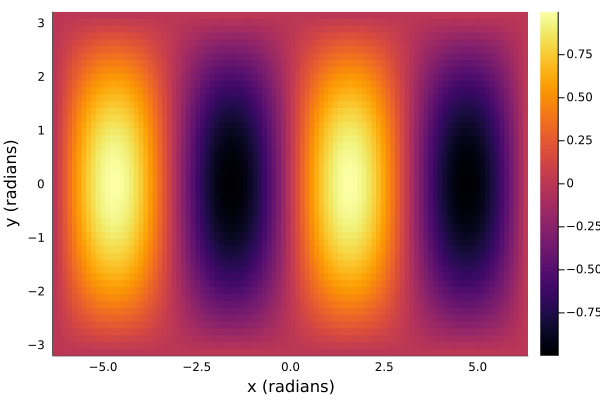

In [88]:
# plot it:        
using Plots  # first import the Plots package. You only need to do this once per Julia session.

# now draw the plot using the heatmap() function:
heatmap(x,y,f,
    xlabel="x (radians)",
    ylabel="y (radians)"
)

Now let's look at another way to evaluation the function that requires only a single line of code. Specifically we will use
what is called an *array comprehension*. Specifically, we create a new array (in brackets below) with the iterators over x and y defined inside the array notation along with the function to evaluate. 

In [89]:
fg = [sin(xg)*cos(0.5*yg) for yg in y, xg in x ]

50×100 Matrix{Float64}:
 1.49976e-32  7.75155e-18  1.53784e-17  …  -7.75155e-18  -1.49976e-32
 1.56927e-17  0.00811081   0.0160911       -0.00811081   -1.56927e-17
 3.13209e-17  0.0161883    0.0321161       -0.0161883    -3.13209e-17
 4.68204e-17  0.0241992    0.0480091       -0.0241992    -4.68204e-17
 6.21275e-17  0.0321108    0.0637048       -0.0321108    -6.21275e-17
 7.71793e-17  0.0398903    0.0791388    …  -0.0398903    -7.71793e-17
 9.19139e-17  0.047506     0.0942476       -0.047506     -9.19139e-17
 1.06271e-16  0.0549264    0.108969        -0.0549264    -1.06271e-16
 1.20191e-16  0.0621211    0.123243        -0.0621211    -1.20191e-16
 1.33618e-16  0.0690606    0.13701         -0.0690606    -1.33618e-16
 1.46495e-16  0.0757163    0.150214     …  -0.0757163    -1.46495e-16
 1.5877e-16   0.0820608    0.162801        -0.0820608    -1.5877e-16
 1.70393e-16  0.0880682    0.174719        -0.0880682    -1.70393e-16
 ⋮                                      ⋱                
 1.5877e-

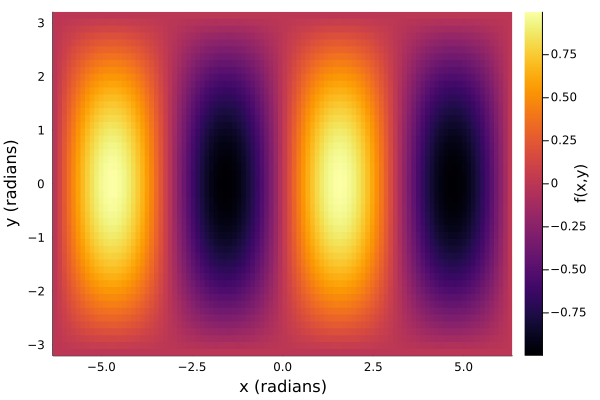

In [90]:
# plot it:        
heatmap(x,y,fg,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  # new command, adds colorbar label
)

As you can see, the array comprehension method is much more concise than the explicit double for-loop method we first used to evaluation the function. 

Let's take a closer look at the array comprehension and how the order of the two arrays given after the `for` statement impacts the size of the output array.

In [91]:
# note the size of fg using the array comprehension as written above:
fg = [sin(xg)*cos(0.5*yg) for yg in y, xg in x ]
size(fg) # size() returns (number of rows, number of columns) of fg

(50, 100)

In [92]:
fg_reverse = [sin(xg)*cos(0.5*yg) for  xg in x, yg in y ]
size(fg_reverse) 

(100, 50)

Since x has 100 values and y has 50 values, these examples show that the first iteration array after `for` is varied over the rows of `fg` and the second iteration array is varied over the columns of `fg`.

# Additional 2D Plotting Commands:

 In the above examples, we plotted the 2D gridded surface using the `heatmap` plotting function, which uses a continuous spectrum of colors for each grid point. If you want more discrete color intervals, you can instead used the `contour` function, which makes  contour plots.
 
The general syntax is `contour(x,y,z)`.

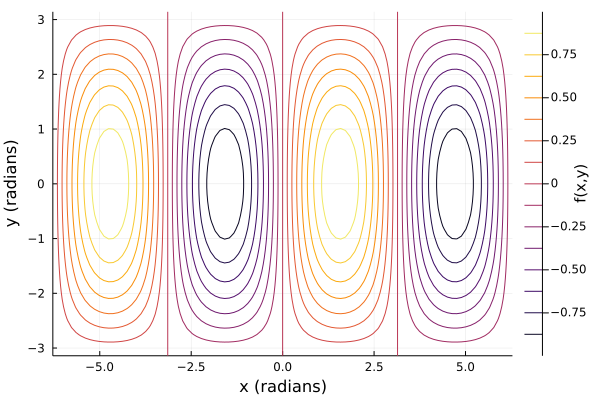

In [93]:
contour(x,y,f,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

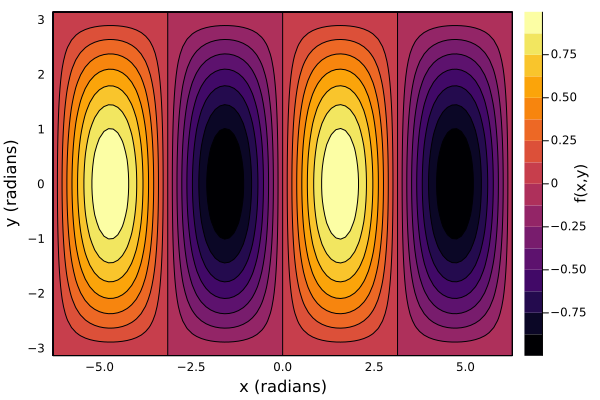

In [94]:
# Contour plot with filled contours using the `fill=true` argument:
contour(x,y,f,fill=true,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

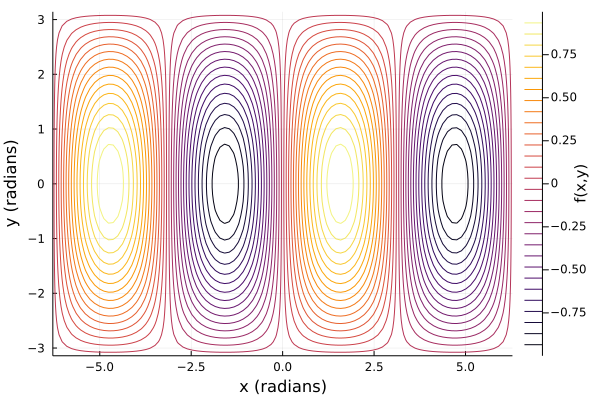

In [95]:
# You can set the number of contours using the argument `levels=number_of_levels`
# and it will create number_of_levels contours. This example sets it to draw 30 contours:
contour(x,y,f,levels=30,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

Also, you can adjust the colorscale limits using the `clim()` function:

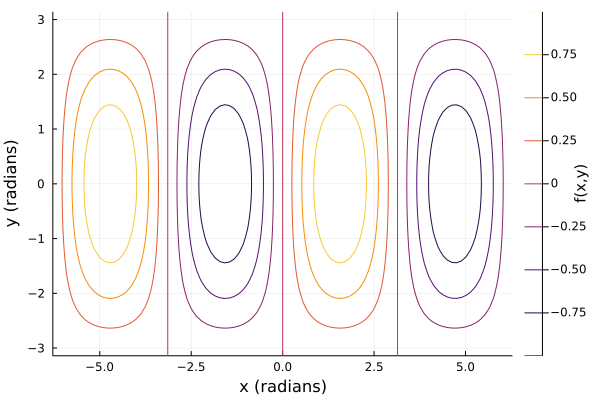

In [96]:
# Alternatively, you can explicitly specify the contour levels using `levels=[array of contour levels]`
levs = -1:.25:1  # here we use a range to define the contour levels, then we use `levs` as an argument to the contour() function
contour(x,y,f,levels=levs,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

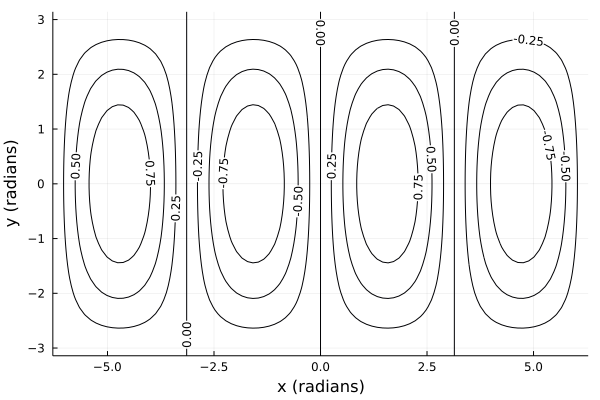

In [97]:
# Contour plot with plain labelled contours
contour(x,y,f,levels=levs,
    xlabel="x (radians)",
    ylabel="y (radians)",
    contour_labels = true,
    colorbar=false
)

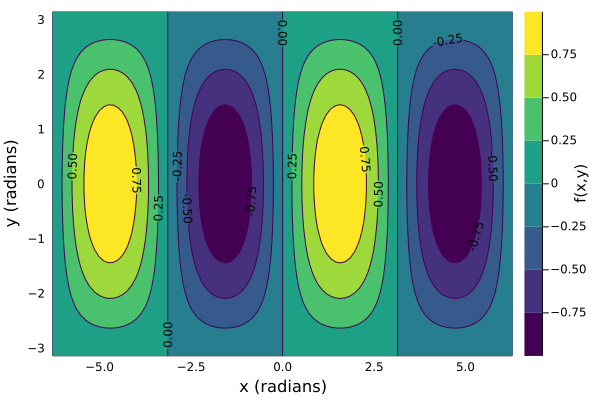

In [98]:
# Contour plot with plain labelled contours
contour(x,y,f,levels=levs,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)" , 
    fill=true,
    contour_labels = true,
    colorbar=true,
    c=:viridis     # use different colormap
)

# Array Booleans (Logicals):
Boolean arrays are helpful for including certain values from arrays. For example, suppose we have the array:

In [99]:
vals =[-1 2 -10 1; 1 2 3 -2]
print(vals)

[-1 2 -10 1; 1 2 3 -2]

In [100]:
b_negative = vals .< 0   
# note the use of the . here to specify the element by element use of the < operator on the elements in `vals`

2×4 BitMatrix:
 1  0  1  0
 0  0  0  1

In [101]:
# Extract only the negative values:
vals[b_negative]

3-element Vector{Int64}:
  -1
 -10
  -2

In [102]:
# Take a sum of the negative values:  
sum(vals[b_negative])

-13

Now let's try applying a boolean array to our `fg` array and then plot the results.
Suppose we want to reassign any negative values in `fg` to instead be 0. This is easily accomplished with the following commands:

In [103]:
fg[fg .< 0] .= 0;   
# Note the use of ".<" (i.e. the dot) for element by element application of the < operator. 
# Also note the .=, for element by element assignment of the value 0 to all fg values that are less than 0. 

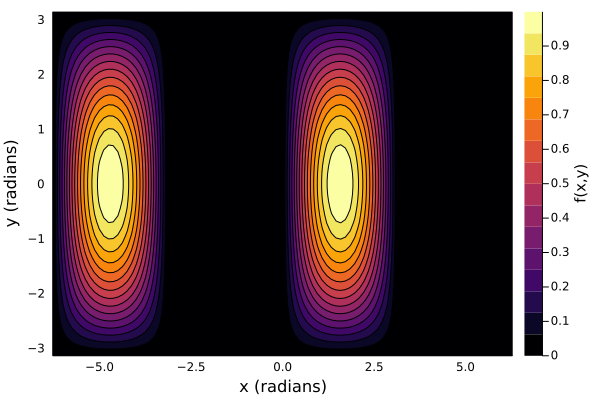

In [104]:
# Now plot fg and see that indeed all the previously negative values are now set to 0
contour(x,y,fg,fill=true,
    xlabel="x (radians)",
    ylabel="y (radians)",
    colorbar_title ="f(x,y)"  
)

In the example above, I used `fg[fg .< 0] .= 0` since that is a very compact formula. 
Alternatively, the same results could be accomplished by using an intermediate boolean
array that is true where the corresponding elements of `fg` are negative:

In [105]:
negative = fg .< 0
fg[negative] .= 0

0-element view(::Vector{Float64}, Int64[]) with eltype Float64

# Gridding Unevenly Spaced Data Onto an Evenly Spaced Grid

In Earth and Environmental Sciences, we often encounter data sampled unevenly. For example, groundwater is sampled in many different wells that are located where ever wells have been drilled into the ground. Rock and soil samples are collected where the ground surface is accessible (i.e. where there are no  roads, buildings, etc). This results in unevenly sampled data that can't be plotted as a surface using `heatmap` function. Yet, making  2D surface plots can be very instructive in data analysis and thus it is common practice to re-grid the samples onto an evenly spaced grid.  There are many methods for re-gridding data, as well as for extrapolating to regions outside the sampled region. Here we will use Gaussian interpolation, which interpolates the values based on fitting exponential basis functions to the sample values, and then evaluating the exponential basis functions at the requested grid points.

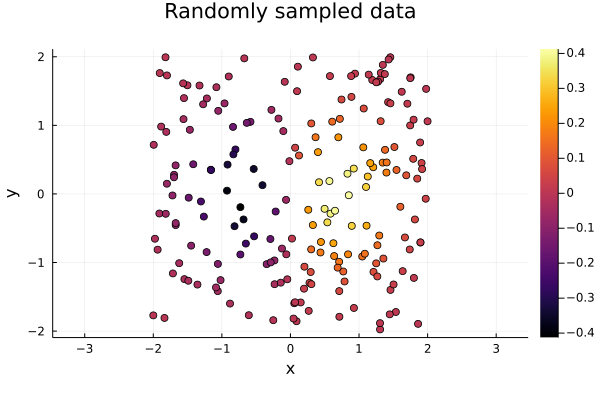

In [106]:
# As an example, let's generate 200 random points located in the x,y plane:
using Plots 

npts = 200 
x = 4*rand(npts) .- 2  # this generates npts random, uniformly distributed numbers on the range -2 to +2
y = 4*rand(npts) .- 2 

 # evaluate a 2D function using the random data. These points (along with their x,y positions) are our synthetic data set:
z = x.*exp.(-x.^2 - y.^2) # note the use of the . before each operator, as required for element by element array operation

# plot them:
scatter(x,y,zcolor = z,
    label=nothing,
    aspect_ratio=:equal,   # new command: sets equal aspect ratio for x and y plot axes.
    xlabel="x",
    ylabel="y",
    title="Randomly sampled data"
    )   

To grid the data, we will use the ScatteredInterpolation package. So our first step is to import the package. If you 
get an error message from the command below, uncomment the line the first line and re-run the cell:

In [109]:
# import Pkg; Pkg.add("ScatteredInterpolation") # uncomment this line to install the package if it's not already installed
using ScatteredInterpolation   

We will use the `interpolate()` and `evaluate()` functions provided by `ScatteredInterpolation`, but their usage is a little bit more involved than the level of coding experience expected at this point in the Computational Earth Science Course, so below I have created a simple wrapper function `griddata()` that you can use instead.

In [110]:
"""
    zg = griddata(x,y,z,xg,yg)

Interpolate unevenly sampled data onto the grid defined by vectors `xg` and `yg`
using Gaussian (exponential) interpolating basis functions from package ScatteredInterpolation.

`x,y,z` define the input data with values `z` at positions in arrays `x` and `y`. 

Interpolated values output to array `zg` are computed at the locations specified by input
vectors `xg` and `yg`. Note `xg` and `yg` define the spacing in `x` and `y` independently
so that `griddata` computes  `zg` at the length(xg)*length(yg) positions defined by 
by all combinations of the `xg` and `yg` array elements.

"""
function griddata(x,y,z,xg,yg)

    # form interpolation function using the points [x,y] and their values z:
    itp = interpolate(Gaussian(), [x y]', z) 
    # note the use of the tranpose operator ' above, which swaps the rows and columns in the [x y] array
    # since interpolate expects a 2 x n array of points 

    gridpoints = [repeat(xg,inner=length(yg))[:]  repeat(yg,outer=length(xg))[:] ]' 
    # note the use of the tranpose operator ', which swaps the rows and columns in the array
    # so that there gridpoints is a 2 x ng array.
    
    # Evaluate interpolation function at grid points:
    interpolated = evaluate(itp,gridpoints)

    # reshape one-dimensional interpolated array into 2D matrix:
    zg = reshape(interpolated, length(yg), length(xg))
    
    return zg 
end

griddata

In [111]:
?griddata() # print out the help docstring for our new griddata() function:

```
zg = griddata(x,y,z,xg,yg)
```

Interpolate unevenly sampled data onto the grid defined by vectors `xg` and `yg` using Gaussian (exponential) interpolating basis functions from package ScatteredInterpolation.

`x,y,z` define the input data with values `z` at positions in arrays `x` and `y`. 

Interpolated values output to array `zg` are computed at the locations specified by input vectors `xg` and `yg`. Note `xg` and `yg` define the spacing in `x` and `y` independently so that `griddata` computes  `zg` at the length(xg)*length(yg) positions defined by  by all combinations of the `xg` and `yg` array elements.


In [113]:
# Create ranges defining spacing of x and y grid points:
xg = range(-2,2,length=30)
yg = range(-2,2,length=50)

# interpolate the values in z at these new grid points:
zg = griddata(x,y,z,xg,yg);

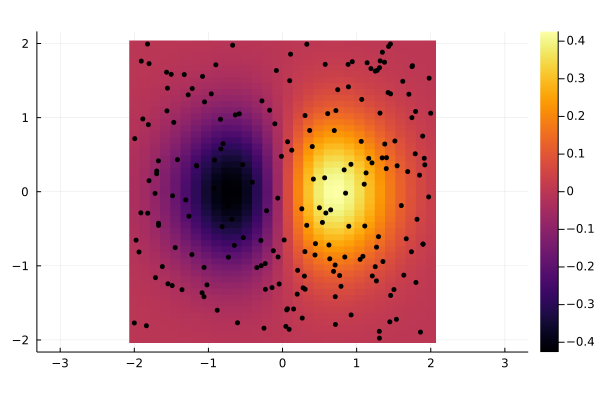

In [114]:
# Plot new interpolated data on grid poitns:
heatmap(xg,yg,zg,aspect_ratio=:equal) 

# add some dots showing the original unevenly sampled data points:
scatter!(x,y,label=nothing, markershape = :circle, markersize = 3,markercolor=:black) 
# note the ! after scatter, which calls the version of scatter() that adds to an existing plot
# if instead you call scatter() it will creat a new plot, erasing the existing heatmap plot.

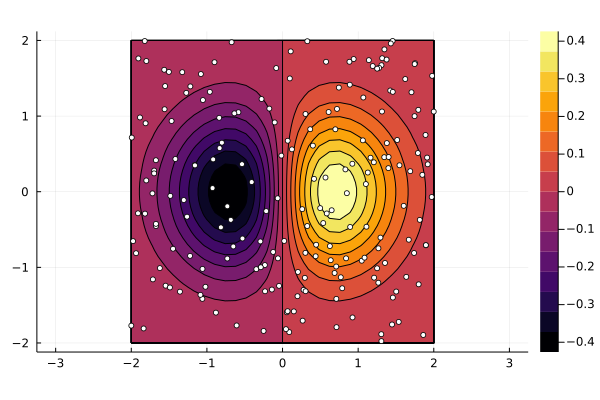

In [115]:
# Alternatively plot using contours:
contour(xg,yg,zg,
    aspect_ratio=:equal,
    fill=true
    )  

# add some dots showing the original unevenly sampled data points:
scatter!(x,y,label=nothing, markershape = :circle, markersize = 3,markercolor=:white)